# Lecture 09 :

- #### Thực hành Phân tích dữ liệu với tập dữ liệu Titanic
    - #### 1. Đọc và kiểm tra dữ liệu
    - #### 2. Tiền xử lý dữ liệu
    - #### 3. Thống kê mô tả và Phân tích khám phá (EDA)
    - #### 4. Xây dựng mô hình dự đoán 
        - ##### 4.1 Mô hình Logistic Regression
        - ##### 4.2 Chuẩn bị dữ liệu cho mô hình
        - ##### 4.3 Huấn luyện mô hình
        - ##### 4.4 Dùng mô hình để dự đoán
        - ##### 4.5 Đánh giá mô hình
        


<img src="titanic.jpg" width=600 height=400 />
Vụ chìm tàu Titanic là một trong những vụ đắm tàu khét tiếng nhất trong lịch sử.

Vào ngày 15 tháng 4 năm 1912, trong chuyến hành trình đầu tiên của mình, con tàu RMS Titanic được nhiều người coi là “không thể chìm” đã chìm sau khi va chạm với một tảng băng trôi. Khi tai nạn xảy ra, không có đủ xuồng cứu sinh cho mọi người trên tàu, dẫn đến cái chết của 1502 trong số 2224 hành khách và thủy thủ đoàn.

Mặc dù có một số yếu tố may mắn liên quan đến việc sống sót, nhưng có vẻ như một số nhóm người có nhiều khả năng sống sót hơn những nhóm khác.

Trong bài này, chúng ta sẽ xây dựng một mô hình dự đoán để trả lời câu hỏi: "Nhóm người nào có nhiều khả năng sống sót hơn?" sử dụng dữ liệu hành khách (nghĩa là tên, tuổi, giới tính, tầng lớp kinh tế xã hội, v.v.).

Cho tập dữ liệu Titanic (titanic.csv) : là tập dữ liệu thông tin về hành khách đã lên tàu titanic, và kết quả người người còn sống sót qua thảm kịch hay không. Có các trường dữ liệu như sau :
- survival : Cuối cùng người này còn sống hay không , 0 = No, 1 = Yes
- passengerId: mã số khách.
- pclass : Hạng vé , 1 = Hạng cao, 2 = Hạng trung, 3 = Hạng thấp
- sex :Giới tính
- Age : Tuổi
- sibsp :số người thân (anh chị em và chồng vợ) cùng tên tàu
- parch : số người thân ( cha mẹ hoặc con cái ) cùng lên tàu
- ticket : Mã vé tàu
- fare : giá vé
- cabin :số cabin
- embarked : Địa điểm lên tàu, C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- #### 1. Đọc và kiểm tra dữ liệu

In [6]:
df = pd.read_csv("titanic.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3'],
      dtype='object')

- Kiểm tra dữ liệu

In [9]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- #### 2. Tiền xử lý dữ liệu

- Đổi kiểu dữ liệu phù hợp cho trường dữ liệu

In [11]:
# đổi kiểu dữ liệu của PassengerID thành string
df['PassengerId'] = df['PassengerId'].astype("str")

- Xác định các biến liên tục, biến phân loại

In [12]:
# xác định các biến liên tục
continuous_variables = ['Age','SibSp','Parch','Fare']

In [13]:
# xác định các biến phân loại
catigorical_variables = ['Sex','Embarked','Pclass']

- Xử lí outliers và missing values

<AxesSubplot:>

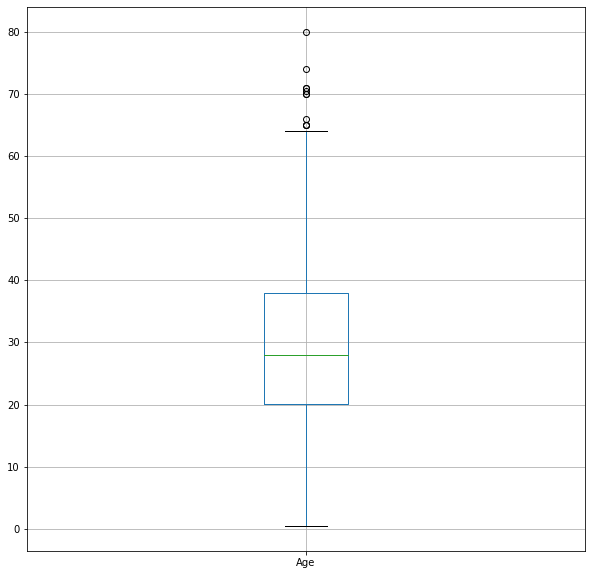

In [14]:
df.boxplot(column="Age", figsize=(10,10))

In [15]:
# Dùng IQR để xem giá trị outlier
Q1 = np.percentile(df['Age'].dropna(), 25)
Q3 = np.percentile(df['Age'].dropna(), 75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
upper,lower

(64.8125, -6.6875)

In [16]:
# Ta không loại bỏ outliers, vì các giá trị ghi nhận theo ta nhận thấy là hợp lý, không có lỗi trong qá trình thu thập dữ liệu
df[df['Age'] > upper]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [17]:
# điền missing values của "Age" là mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [18]:
# điền missing values của "Embarked" là S (giá trị phổ biến nhât)
df['Embarked'] = df['Embarked'].fillna("S")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


- #### 3. Thống kê mô tả và Phân tích khám phá (EDA)

In [20]:
# thống kê mô tả cho các biến liên tục
df[continuous_variables].describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

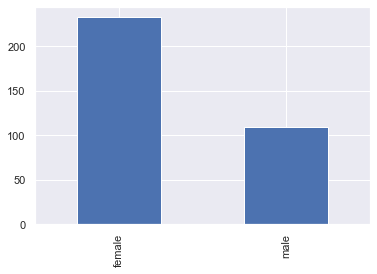

In [21]:
sns.set_theme()
# trả lời câu hỏi : Trong số những người sống sót, nam hay nữ nhiều hơn (cho số liệu):
df[df['Survived'] == 1]['Sex'].value_counts().plot(kind = 'bar')

<Figure size 720x216 with 0 Axes>

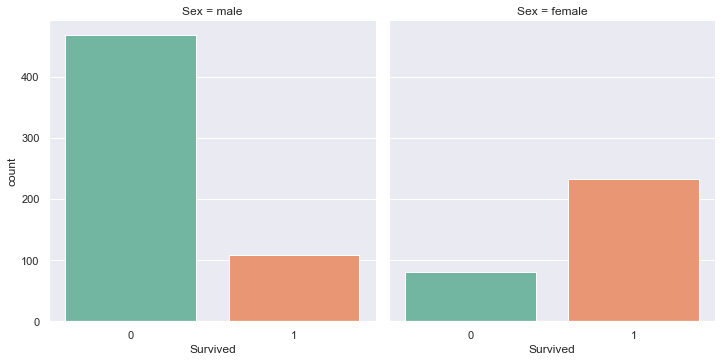

In [22]:
# sử dụng catplot
sns.set_theme(palette = 'Set2')
plt.figure(figsize=(10, 3))
sns.catplot(data = df, x = "Survived", col='Sex' , kind = 'count')
plt.show()

<Figure size 720x216 with 0 Axes>

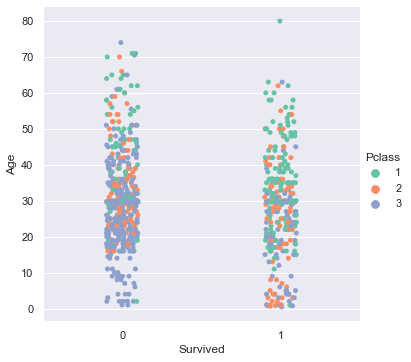

In [23]:
# Biểu đồ stripplot thể hiện sự phân phố của Age theo Survived và Pclass
sns.set_theme(palette = 'Set2')
plt.figure(figsize=(10, 3))
sns.catplot(data = df, x = "Survived", y='Age', hue ='Pclass' , kind = 'strip')
plt.show()

<AxesSubplot:>

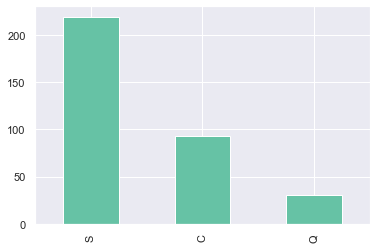

In [24]:
# trả lời câu hỏi : Trong số những người sống sót, số người của từng bến (Embarked - nơi hành khách lên tàu) là bao nhiêu
df[df['Survived'] == 1]['Embarked'].value_counts().plot(kind = 'bar')

<Figure size 720x216 with 0 Axes>

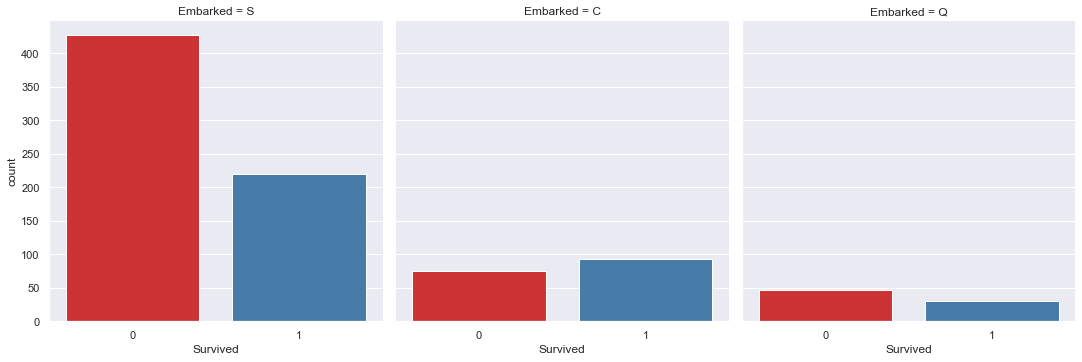

In [25]:
#sử dụng catplot
sns.set_theme(palette = 'Set1')
plt.figure(figsize=(10, 3))
sns.catplot(data = df, x = "Survived", col='Embarked' , kind = 'count')
plt.show()

In [26]:
# trả lời câu hỏi : Trong số những người sống sót, số người của từng hạng giá vé là bao nhiêu (pclass )

<AxesSubplot:>

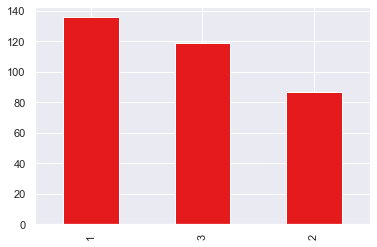

In [27]:
df[df['Survived'] == 1]['Pclass'].value_counts().plot(kind = 'bar')

<Figure size 720x216 with 0 Axes>

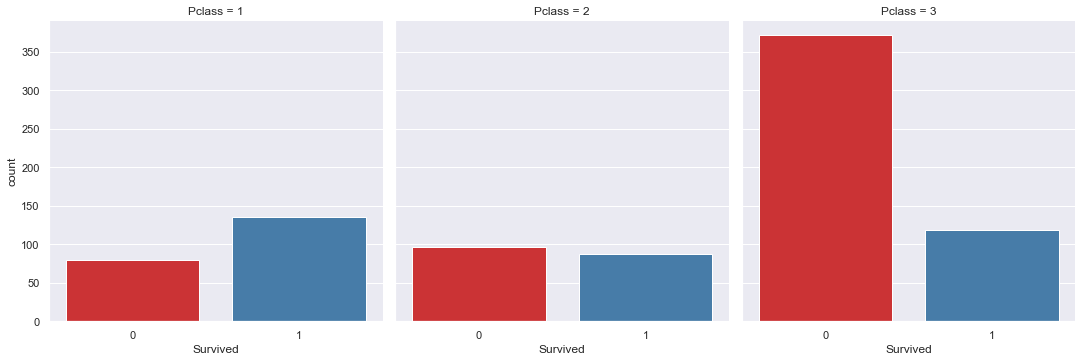

In [28]:
# Sử dụng catplot
sns.set_theme(palette = 'Set1')
plt.figure(figsize=(10, 3))
sns.catplot(data = df, x = "Survived", col='Pclass' , kind = 'count')
plt.show()

In [29]:
# Tạo df_heatmap để vẽ heatmap gồm biến liên tục và Survived
df_heatmap= df[['Survived' , 'Age', 'SibSp', 'Pclass', 'Fare']]

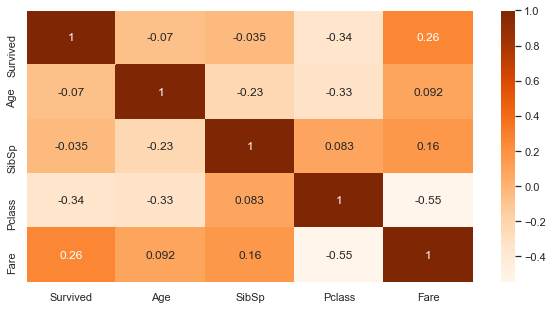

In [30]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='Oranges');

- #### 4. Xây dựng mô hình dự đoán 

- ##### 4.1 Mô hình Logistic Regression

- Logistic Regression là một mô hình dữ đoán dùng để dự đoán kết quả Có/Không, Đúng/Sai, Được/Không được, Sống/Chết...
- Phương trình mô hình :
$$ Y =\beta_0  + \beta_1.X_1 + \beta_1.X_2 + \beta_1.X_3 ...$$
Trong đó : 
    - $Y$ : là biến dự đoán (output - predicted variable) - chỉ nhận giá trị từ 0 đến 1
    - $X_1,X_2,X_3...$ là các biến dùng để dự đoán (input - preditors) , các biến này phải ở dạng numeric
    - $\beta_1,\beta_2,\beta_3...$ là các trọng số ta cần đi tìm cho mô hình, nó thể hiện sự ảnh hưởng của biến X tương ứng đó lên biến Y
    
![title](logistic_regression.png)

- ##### 4.2 Chuẩn bị dữ liệu cho mô hình

1. Ta cần đưa các biến phân loại thành các biến liên tục bằng phương pháp tạo thuộc tính (tạo dummy variables)
2. Ta xác định các biến dùng để dự đoán $X_1,X_2,...$, (input-predictors) , và xác định biến $Y$ output
3. Ta tách tập dữ liệu ra thành **training set** ( tập dùng để huấn luyện mô hình) và **testing set** ( tập dùng để kiểm tra mô hình )
![title](train_test_split.jpg)

- Tạo thuộc tính (biến dummy)

In [31]:
# get_dummy cho "Embarked" 
df = pd.concat( [df , pd.get_dummies(df['Embarked'],prefix = 'Embarked')] , axis = 1)

In [32]:
# get_dummy cho "Sex" 
df = pd.concat( [df , pd.get_dummies(df['Sex'],prefix = 'Sex')] , axis = 1)

In [33]:
# get_dummy cho "Pclass" 
df = pd.concat( [df , pd.get_dummies(df['Pclass'],prefix = 'Pclass')] , axis = 1)

- Chọn các trường dữ liệu cần thiết để xây dựng mô hình

In [34]:
# Các biến X ( biến dùng đề dự đoán - biến tiên lượng - predictors)
X_cols = [ 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3']

In [35]:
df_X = df[X_cols]

In [36]:
# Các biến Y (biến dự đoán - predicted )
df_Y = df[['Survived']]

In [37]:
df_Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


- Tách tập dữ liệu ra thành Training Set và Testing Set 

In [38]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,random_state=88)

##### 4.3 Huấn luyện mô hình

In [65]:
# import thư viện  : from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [66]:
# tạo mô hình
LogisticRegression_model = LogisticRegression(max_iter=4000)

In [67]:
# dùng hàm fit() để huấn luyện mô hình vơi tập training set
LogisticRegression_model.fit(X_train,y_train)

c:\Users\lamvu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=4000)

In [55]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [68]:
# Xem các trọng số để xem sự ảnh hưởng của các biến X lên Y
LogisticRegression_model.coef_

array([[-3.79276874e-02, -1.91022106e-01, -1.60055396e-01,
         8.45584004e-04,  3.24271956e-01, -5.75458525e-03,
        -3.16385870e-01,  1.29210132e+00, -1.28996982e+00,
         1.01744658e+00,  8.95932426e-02, -1.10490832e+00]])

In [57]:
LogisticRegression_model.intercept_

array([1.9888944])

##### 4.4 Dùng mô hình để dự đoán

In [74]:
# tạo y_predict là array các kết quả dự đoán cho X_test
y_predict = LogisticRegression_model.predict(X_test)

In [75]:
y_predict

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1], dtype=int64)

##### 4.5 Đánh giá mô hình

Confusion matrix được dùng để đánh giá mô hình Logistic Regression, bao gồm các giá trị :
- True Positive : Positive outcome is correctly predicted as positive.
(Ta dự đoán là `Dương tính`, và trên thực tế đúng là `Dương tính`)
- True Negative : Negative outcome is correctly predicted as negative.
(Ta dự đoán là `Âm tính`, và trên thực tế đúng là `Âm tính`)
- False Positive: Negative outcome is wrongly predicted as positive.
(Ta dự đoán là `Dương tính`, và ta dự đoán sai vì trên thực tế là `Âm tính`)
- False Negative: Positive outcome is wrongly predicted as negative.
(Ta dự đoán là `Âm tính`, và ta dự đoán sai vì trên thực tế là `Dương tính`)

<img src="confusion-matrix-in-python.jpg" width=400 height=300 />


- Accuracy : It is correctly predicted outcome to total outcomes.<br>
`Accuracy = (TP+TN)/(TP+FP+FN+TN)`.<br>
- Precision : It tells us if we have predicted a positive outcome, how much we are sure it will be true positive. In mathematicaly we can say, it is the proportion of true positive on all positives predictions.<br>
`Precision = TP/(TP+FP)`.<br>
- Recall : It is the proportion of true positives on all actual positive elements. Recall is also known as true positive rate..<br>
   `Recall = TP/(TP+FN)`

In [72]:
# import các thư viện kiểm định mô hình
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [76]:
# tạo confusion matrix trên y_test và y_predic
confusion_matrix = confusion_matrix(y_test,y_predict)
confusion_matrix

array([[95, 22],
       [16, 46]], dtype=int64)

In [77]:
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(y_test, y_predict)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(y_test, y_predict)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_test, y_predict)))

Accuracy of Logistic Regression model is  :  0.7877094972067039
Recall of Logistic Regression model is    :  0.7419354838709677
Precision of Logistic Regression model is :  0.6764705882352942
